In [78]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [6]:
books = pd.read_csv('bestsellers with categories.csv')

print(books.head())


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [7]:
print(books.shape)
len(books["Name"].unique())
# Про скільки книг зберігає дані датасет? - Відповідь: Про скільки книг -  549, про скільки унікальних книг - 351

(550, 7)


351

In [8]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(books.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [6]:
omissions = books.isnull().sum()
print(omissions)
# Чи є в якихось змінних пропуски? - Відповідь: НІ

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [9]:
print(pd.unique(books.iloc[:, -1]))
# Які є унікальні жанри? - Виходить що тільки два: Fiction та Non Fiction

['Non Fiction' 'Fiction']


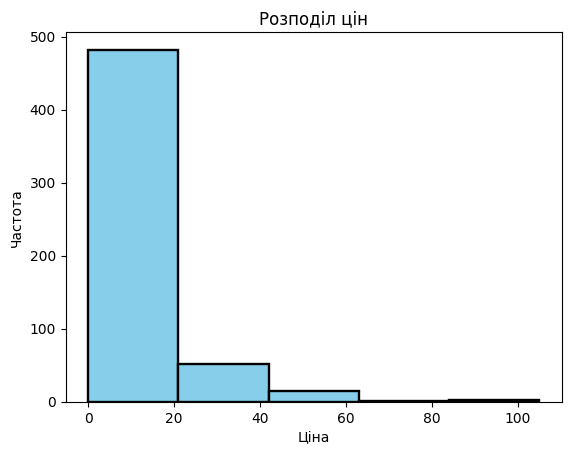

In [10]:
plt.hist(books['price'], bins=5, color='skyblue', edgecolor='black', linewidth=1.7)

plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')

plt.show()

In [11]:
df = pd.DataFrame(books)
# Знаходження мінімальної ціни книги
min_price = df['price'].min()
print(f'Якщо припустити, що комусь дарували книгу безкоштовно, то min price буде - {min_price}')



df['price'] = df['price'].replace(0, np.nan)

# Знаходження мінімальної ціни книги, яка більше за 0
min_price = df['price'].min(skipna=True)
print(f'Якщо відкинути нулі (можливо була прихована вартість), то min price буде - {min_price}')

Якщо припустити, що комусь дарували книгу безкоштовно, то min price буде - 0
Якщо відкинути нулі (можливо була прихована вартість), то min price буде - 1.0


In [12]:
max_price = df['price'].max()
print(f'max price в данній таблиці - {max_price}')


max price в данній таблиці - 105.0


In [13]:
mean_price = df['price'].mean()
print(f'mean price буде - {round(mean_price, 2)}')


mean price буде - 13.39


In [14]:
median_price = df['price'].median()
print(f'median price буде - {median_price}')

median price буде - 11.0


In [15]:
# Який рейтинг у датасеті найвищий? Відповідь:
max_rating = df['user_rating'].max()
print(f'Найвищий рейтинг у датасеті - {max_rating}')

Найвищий рейтинг у датасеті - 4.9


In [16]:
# Скільки книг мають такий рейтинг? Відповідь:
count_max_rating = df[df['user_rating'] == max_rating].count()
print(f'Найвищий рейтинг мають {count_max_rating["name"]} книги')

Найвищий рейтинг мають 52 книги


In [18]:
# Яка книга має найбільше відгуків? Відповідь:
max_reviews = df['reviews'].max()
book_with_max_reviews = df[df['reviews'] == max_reviews]['name'].iloc[0]
print(f'Найбільше відгуків має книга під назвою - {book_with_max_reviews}')

Найбільше відгуків має книга під назвою - Where the Crawdads Sing


In [19]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
count_books_2015 = df[df['year'] == 2015].count()
print(f'Кількість книг 2015 року {count_books_2015["name"]}')

books_2015 = df[df['year'] == 2015]
most_expensive = books_2015[books_2015['price'] == books_2015['price'].max()]

print(f'Найдорожча книга серед Топ-50 у 2015 році - {most_expensive["name"].iloc[0]}')

Кількість книг 2015 року 50
Найдорожча книга серед Топ-50 у 2015 році - Publication Manual of the American Psychological Association, 6th Edition


In [20]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
count_books_2010 = df[df['year'] == 2010].count()
print(f'Кількість книг 2010 року {count_books_2010["name"]}')

count_fiction_top_50_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].nlargest(50, 'reviews').shape[0]
print(f'Кількість книг жанру Fiction у Топ-50 у 2010 році: {count_fiction_top_50_2010}')


Кількість книг 2010 року 50
Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


In [21]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
count_rating_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
# count_rating_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(f'Кількість книг з рейтингом 4.9, які потрапили до рейтингу у 2010 та 2011 роках: {count_rating_4_9}')

Кількість книг з рейтингом 4.9, які потрапили до рейтингу у 2010 та 2011 роках: 1


In [22]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів 
# (використовуйте функцію sort_values).
# Яка книга остання у відсортованому списку? Відповідь:

sorting_2015_books = df[(df['year'] == 2015) & (df['price'] < 8)]

# Сортування за ціною
sorting_2015_books = sorting_2015_books.sort_values(by='price')

# print(sorting_2015_books)
print(f'Остання книга у відсортованому списку - {sorting_2015_books["name"].iloc[-1]}')

Остання книга у відсортованому списку - Old School (Diary of a Wimpy Kid #10)


In [23]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 
# (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). 
# Не беріть усі стовпці, виберіть тільки потрібні вам

genre_price_range = df.groupby('genre')['price'].agg(['min', 'max'])
print(genre_price_range)
print("Максимальна ціна для жанру Fiction - 82")
print("Максимальна ціна для жанру Non Fiction - 105")
print("Мінімальна ціна для жанру Fiction - 2")
print("Мінімальна ціна для жанру Non Fiction - 2")

             min    max
genre                  
Fiction      2.0   82.0
Non Fiction  1.0  105.0
Максимальна ціна для жанру Fiction - 82
Максимальна ціна для жанру Non Fiction - 105
Мінімальна ціна для жанру Fiction - 2
Мінімальна ціна для жанру Non Fiction - 2


In [24]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
# Не беріть усі стовпці, виберете тільки потрібні

# Щоб дізнатись реальну кількість книг для кожного автора потрібно відсіяти дублікати
unique_books_df = df.drop_duplicates(subset='name')

count_books_for_authors = unique_books_df.groupby('author').size().reset_index(name='count')

print(count_books_for_authors)

                         author  count
0              Abraham Verghese      1
1                Adam Gasiewski      1
2                 Adam Mansbach      1
3                     Adir Levy      1
4    Admiral William H. McRaven      1
..                          ...    ...
243             Walter Isaacson      2
244               William Davis      1
245            William P. Young      1
246            Wizards RPG Team      1
247                Zhi Gang Sha      2

[248 rows x 2 columns]


In [ ]:
# Якої розмірності вийшла таблиця - 248 rows x 2 columns

In [36]:
# Який автор має найбільше книг?
author_with_max_books_name = count_books_for_authors.loc[count_books_for_authors['count'].idxmax(), 'author']

print(f'Автор з найбільшою кількістю книг: {author_with_max_books_name}')

Автор з найбільшою кількістю книг: Jeff Kinney


In [37]:
# Скільки книг цього автора?
books_count = count_books_for_authors.loc[count_books_for_authors['author'] == author_with_max_books_name, 'count'].iloc[0]

print(f'Кількість книг автора "{author_with_max_books_name}": {books_count}')

Кількість книг автора "Jeff Kinney": 12


In [47]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
# (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). 
# Не беріть усі стовпці, виберете тільки потрібні

average_autor_ratings = df.groupby('author')['user_rating'].agg('mean').reset_index(name='average_rating').round({'average_rating': 2})

print(average_autor_ratings)

                         author  average_rating
0              Abraham Verghese            4.60
1                Adam Gasiewski            4.40
2                 Adam Mansbach            4.80
3                     Adir Levy            4.80
4    Admiral William H. McRaven            4.70
..                          ...             ...
243             Walter Isaacson            4.57
244               William Davis            4.40
245            William P. Young            4.60
246            Wizards RPG Team            4.80
247                Zhi Gang Sha            4.60

[248 rows x 2 columns]


In [50]:
# У якого автора середній рейтинг мінімальний?

min_avg_rate_autor = average_autor_ratings.loc[average_autor_ratings['average_rating'].idxmin(), 'author']
print(f'Мінімальний середній рейтинг у автора {min_avg_rate_autor}')

Мінімальний середній рейтинг у автора Donna Tartt


In [44]:
# Який у цього автора середній рейтинг? 
min_avg_rate = average_author_ratings['average_rating'].min()
print(f'У цього автора середній рейтинг - {min_avg_rate}')

У цього автора середній рейтинг - 3.9


In [54]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг 
# та середній рейтинг (Використовуйте функцію concat з параметром axis=1). 
# Збережіть результат у змінну

new_df = pd.concat([count_books_for_authors.set_index('author'), average_autor_ratings.set_index('author')], axis=1).reset_index()
new_df.columns = ['author', 'count_books', 'average_rating']

print(new_df)

                         author  count_books  average_rating
0              Abraham Verghese            1            4.60
1                Adam Gasiewski            1            4.40
2                 Adam Mansbach            1            4.80
3                     Adir Levy            1            4.80
4    Admiral William H. McRaven            1            4.70
..                          ...          ...             ...
243             Walter Isaacson            2            4.57
244               William Davis            1            4.40
245            William P. Young            1            4.60
246            Wizards RPG Team            1            4.80
247                Zhi Gang Sha            2            4.60

[248 rows x 3 columns]


In [60]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
sort_new_df = new_df.sort_values(by=['count_books', 'average_rating'], ascending=[True, True])
print(sort_new_df)

              author  count_books  average_rating
71       Donna Tartt            1            3.90
90            Gallup            1            4.00
100    Gillian Flynn            1            4.00
171   Muriel Barbery            1            4.00
43      Chris Cleave            1            4.10
..               ...          ...             ...
27     Bill O'Reilly            6            4.64
58        Dav Pilkey            6            4.90
221  Stephenie Meyer            7            4.66
197     Rick Riordan           10            4.77
120      Jeff Kinney           12            4.80

[248 rows x 3 columns]


In [61]:
# Який автор перший у списку?
first_author = sort_new_df.iloc[0]['author']
print(f'Перший автор у списку: {first_author}')

Перший автор у списку: Donna Tartt


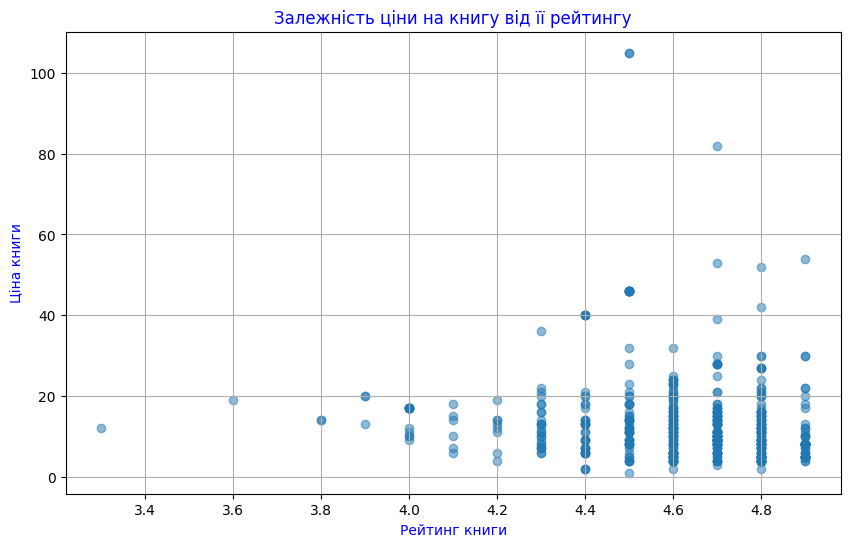

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(df['user_rating'], df['price'], alpha=0.5)
plt.title('Залежність ціни на книгу від її рейтингу', color='b')
plt.xlabel('Рейтинг книги', color='b')
plt.ylabel('Ціна книги', color='b')
plt.grid()
plt.show()

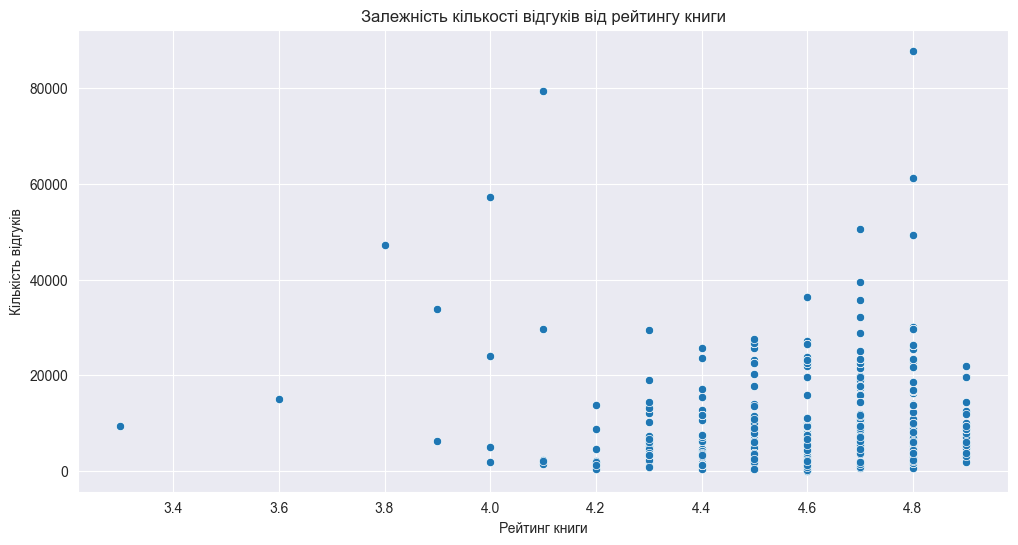

In [89]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_rating', y='reviews', data=df)
plt.xlabel('Рейтинг книги')
plt.ylabel('Кількість відгуків')
plt.title('Залежність кількості відгуків від рейтингу книги')
plt.grid(True)
plt.show()

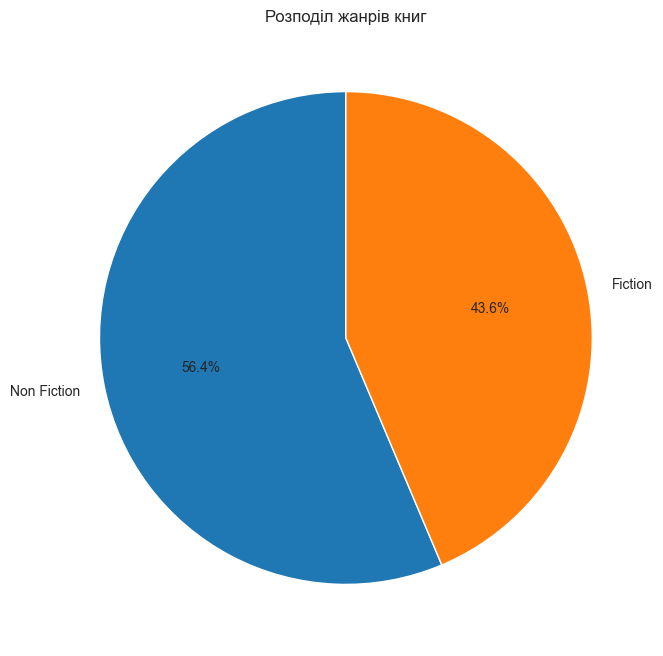

In [80]:
plt.figure(figsize=(8, 8))
df['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Розподіл жанрів книг')
plt.ylabel('')
plt.show()

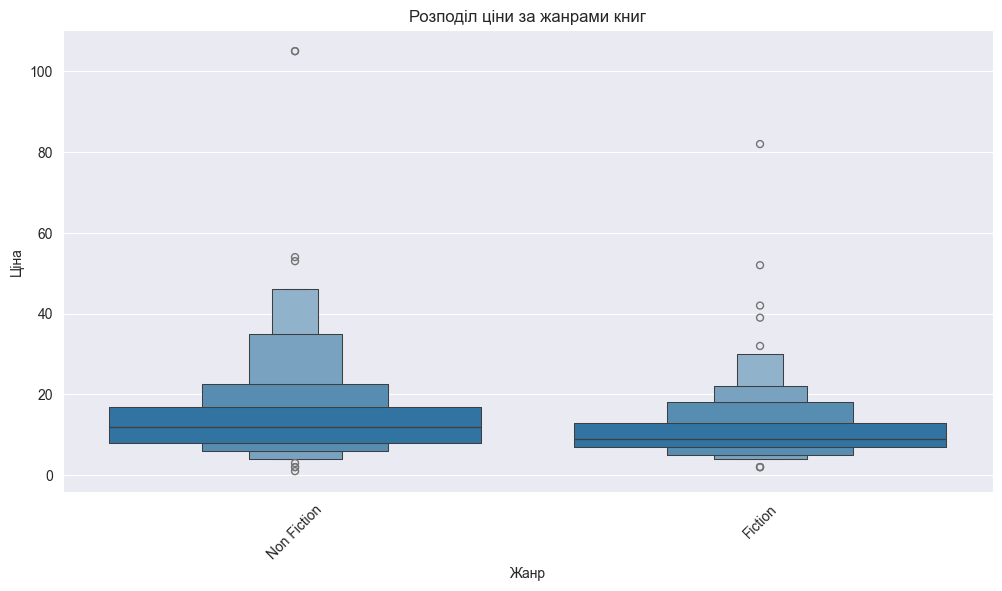

In [81]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='genre', y='price', data=df)
plt.xlabel('Жанр')
plt.ylabel('Ціна')
plt.title('Розподіл ціни за жанрами книг')
plt.xticks(rotation=45)
plt.show()